# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2383 Ноздрин Василий Ярославович и Плюсов Даниил Александрович. Вариант №10.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.  

## Основные теоретические положения

Рассматривается дискретный временной ряд $s_n$ с единичным шагом дискретизации.

### Полиномиальное сглаживание в скользящем окне

Под полиномиальным приближением понимается аппроксимация методом наименьших квадратов (МНК) значений конечного нечётного числа $N = 2M + 1$ элементов временного ряда полиномом заданного порядка $p$:
$$
    \min_{a_0,a_1,\dots,a_p} \sum_{k=-M}^M(s_{n+k}−\sum_{m=0}^p a_mk^m)^2
$$

Сглаженное значение в точке $n$ присваивается значению полинома в центре окна.

Необходимое условие для МНК:

$F(y_k) = \sum_{-M}^{M} (s_M - y_M)^2 → min$


### Частотное представление сигналов

Любой дискретный сигнал может быть представлен как суперпозиция комплексных экспонент:
$$s_n = \sum_{m=1}^{M} c_m e^{i\omega_mn}$$

где $\omega_m = 2\pi f_m$ - круговая частота, связанная с циклической частотой $f_m$.

Входной сигнал будем представлять имменно в таком виде.
$$s(t) = \sum_{m=1}^{M} c_m e^{iw_mt}$$

### Передаточная функция фильтра

Для линейного фильтра выходной сигнал выражается через входной с использованием передаточной функции:
$$y(t)=\sum_{m=1}^M c_m H(\omega_m)e^{j\omega_mt}$$


где $H(\omega)$ - передаточная функция фильтра, характеризующая его частотные свойства.


### Связь с полиномиальным сглаживанием

Полиномиальное сглаживание эквивалентно нерекурсивной цифровой фильтрации с конечной импульсной характеристикой. Передаточная функция такого фильтра имеет вид:
$$H(\omega)=\sum_{k=−M}^M A_k e^{−i\omega k}$$

где $A_k$ - коэффициенты фильтра, определяемые из решения задачи МНК.

### Логарифмическое представление АЧХ

Для анализа ослабления сигнала используется логарифмическая шкала в децибелах:  
$20lg∣H(\omega)∣ = ∣H(\omega)∣$ \[дБ\]

Соотношение между передаточными функциями для циклической и круговой частот:  
$\tilde H(f) = H(2\pi f) = H(\omega)$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Пункты работы выполняется с помощью кода.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.  

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.  


Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

f_freq = np.arange(0, 0.5, 0.0003)
w_freq = 2 * pi * f_freq

### 1. Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.

*Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.*


Рассматривается сглаживание дискретного сигнала $s_n$ прямой линией $y(t) = A + Bt$ методом наименьших квадратов в окне из $N = 2h + 1$ точек.

#### Решение задачи МНК

Минимизируем функционал:
$$F(A,B)=\sum_{k=−h}^h(s_k−A−Bk)^2→min⁡$$

Система нормальных уравнений:

$$
\begin{cases}
    \frac{dF}{dA}=−2\sum_{k=−h}^h(s_k−A−Bk)=0 \\
    \frac{dF}{dB}=−2\sum_{k=−h}^hk(s_k−A−Bk)=0 \\
\end{cases}
$$

$$
\begin{cases}
    (2h+1)A = \sum_{k=−h}^h s_k \\
    \frac{h(h+1)(2h+1)}{3}B=\sum_{k=−h}^h k⋅s_k \\
\end{cases}
$$

#### Передаточная функция

$$y_0=A=\frac{1}{2h+1}\sum_{k=−h}^h s_k$$

Для гармонического сигнала $s_n = e^{j\omega n}$:

$$y(t)=\frac{1}{2h+1}\sum_{k=−h}^he^{j\omega k}= e^{jωn}\frac{1}{2h+1}\sum_{k=−h}^he^{jωk}$$

Передаточная функция:
$$H(\omega)=\frac{1}{2h+1}\sum_{k=−h}^h e^{jωk}$$

#### Аналитические выражения

Для 3 точек ($h=1$):

$$H(ω)=\frac{1}{3}(e^{−jω}+1+e^{jω})=\frac{1}{3}(1+2cos⁡ω)$$

Для 5 точек ($h=2$):

$$H(ω)=\frac{1}{5}(e^{−2jω}+e^{−jω}+1+e^{jω}+e^{2jω})=\frac{1}{5}(1+2cos⁡ω+2cos⁡2ω)$$

Для 7 точек ($h=3$):

$$H(ω)=\frac{1}{7}(1+2cos⁡ω+2cos⁡2ω+2cos⁡3ω)$$

Для 9 точек ($h=4$):

$$H(ω)=\frac{1}{9}(1+2cos⁡ω+2cos⁡2ω+2cos⁡3ω+2cos⁡4ω)$$

#### Альтернативное представление через функцию sin

Используя формулу суммы геометрической прогрессии:
$$H(ω)=\frac{1}{2h+1}\frac{sin⁡((h+12)ω)}{sin⁡(ω2)}$$


Для циклической частоты:

$$\tilde H(f)=\frac{1}{2h+1}\frac{sin⁡((2h+1)πf)}{sin⁡(πf)}$$


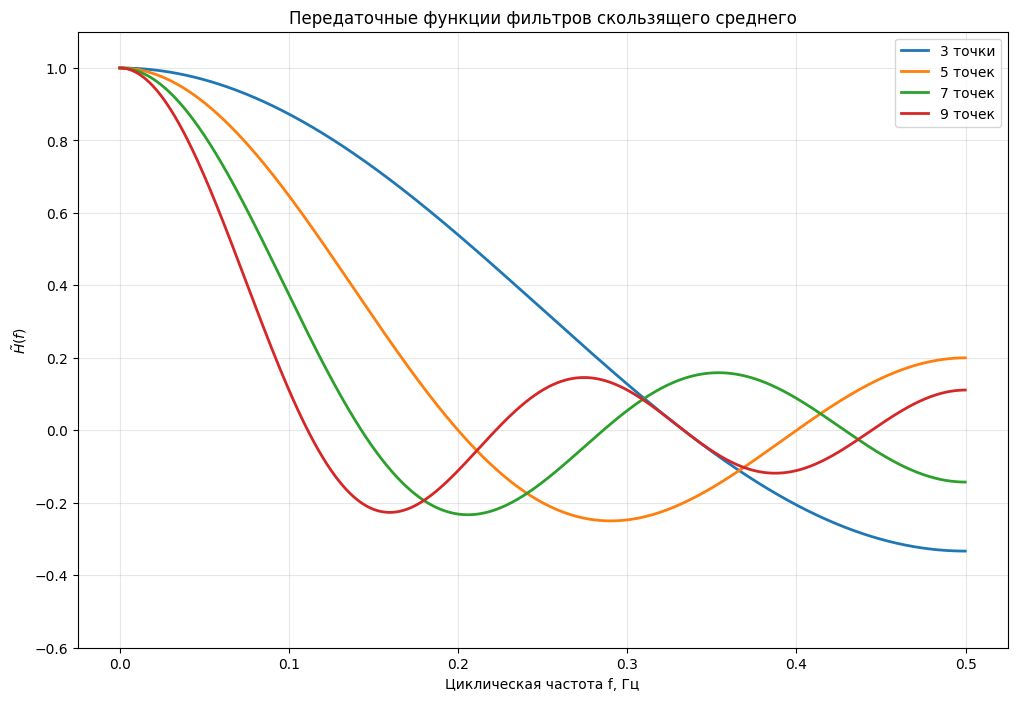

In [2]:
def transfer_function_poly1(N, w):
    """Предаточная функция через сумму косинусов"""
    h = (N - 1) // 2
    k = np.arange(1, h + 1)
    return (1/N) * (1 + 2 * np.sum(np.cos(k * w[:, None]), axis=1))

plt.figure(figsize=(12, 8))

H3_poly1 = transfer_function_poly1(3, w_freq)
H5_poly1 = transfer_function_poly1(5, w_freq)
H7_poly1 = transfer_function_poly1(7, w_freq)
H9_poly1 = transfer_function_poly1(9, w_freq)

plt.plot(f_freq, H3_poly1, label='3 точки', linewidth=2)
plt.plot(f_freq, H5_poly1, label='5 точек', linewidth=2)
plt.plot(f_freq, H7_poly1, label='7 точек', linewidth=2)
plt.plot(f_freq, H9_poly1, label='9 точек', linewidth=2)

plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Передаточные функции фильтров скользящего среднего')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.6, 1.1)

plt.show()

####  

* Все фильтры являются ФНЧ с единичным усилением на нулевой частоте: $H(0) = 1$.  
* величение количества точек N приводит к сужению полосы пропускания, увеличению крутизны спада АЧХ, улучшению подавления высокочастотных компонент.  
* Нули передачи расположены на частотах $f_k = \frac{k}{N}$, где $k = 1, 2, \ldots$.  
Для N=9 первый ноль на f ≈ 0.111 Гц.  
* Малые N (3) обладают широкой полосой пропускания, слабым подавлением ВЧ.  
* Большие N (9) обладают узкой полосой пропускания, сильным подавлением ВЧ, возможна потеря информативных высокочастотных компонент.  

### 2. Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам.



Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Рассматривается аппроксимация сигнала $s(t)$ полиномом второй степени методом наименьших квадратов в симметричном окне из $N$ точек.

#### Решение задачи МНК для 7 точек

Для полинома $y(t) = A + Bt + Ct^2$ минимизируем функционал:

$$F(A,B,C) = \sum_{k=-3}^{3} (s(k) - A - Bk - Ck^2)^2 \to \min$$

Система нормальных уравнений:
$$
\begin{cases}
\frac{\partial F}{\partial A} = -2\sum_{k=-3}^{3} (s(k) - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial B} = -2\sum_{k=-3}^{3} k(s(k) - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial C} = -2\sum_{k=-3}^{3} k^2(s(k) - A - Bk - Ck^2) = 0
\end{cases}
$$

С учётом свойств симметричных сумм:
$$
\begin{cases}
7A + 28C = \sum_{k=-3}^{3} s_k \\
28B = \sum_{k=-3}^{3} k s_k \\
28A + 196C = \sum_{k=-3}^{3} k^2 s_k
\end{cases}
$$

#### Передаточная функция

Для центральной точки окна получаем:
$$y(0) = A = \frac{1}{21}(-2s_{-3} + 3s_{-2} + 6s_{-1} + 7s_0 + 6s_1 + 3s_2 - 2s_3)$$

В общем виде для произвольной позиции $n$:
$$y(n) = \frac{1}{21}(-2s_{n-3} + 3s_{n-2} + 6s_{n-1} + 7s_n + 6s_{n+1} + 3s_{n+2} - 2s_{n+3})$$

Для гармонического сигнала $s(n) = e^{i\omega n}$:
$$y(n) = \frac{1}{21}(-2e^{-3i\omega} + 3e^{-2i\omega} + 6e^{-i\omega} + 7 + 6e^{i\omega} + 3e^{2i\omega} - 2e^{3i\omega})e^{i\omega n}$$

#### Передаточная функция для 7 точек:
$$H(\omega) = \frac{1}{21}(7 + 12\cos\omega + 6\cos 2\omega - 4\cos 3\omega)$$

#### Для 9 точек:
$$H(\omega) = \frac{1}{231}(59 + 108\cos\omega + 78\cos 2\omega + 28\cos 3\omega - 42\cos 4\omega)$$

#### Для 11 точек:
$$H(\omega) = \frac{1}{429}(89 + 168\cos\omega + 138\cos 2\omega + 88\cos 3\omega + 18\cos 4\omega - 72\cos 5\omega)$$

#### Для 13 точек:
$$H(\omega) = \frac{1}{143}(25 + 48\cos\omega + 42\cos 2\omega + 32\cos 3\omega + 18\cos 4\omega - 22\cos 6\omega)$$


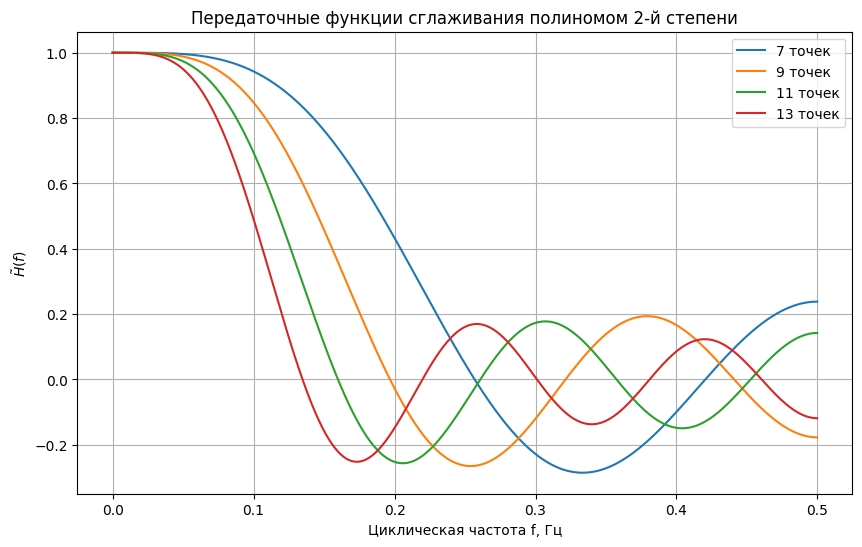

In [3]:
def transfer_function_poly2(N, w):
    """Передаточная функция для сглаживания полиномом 2-й степени по N точкам"""
    coefficients = {
        7: [7, 12, 6, -4],
        9: [59, 108, 78, 28, -42],
        11: [89, 168, 138, 88, 18, -72],
        13: [25, 48, 42, 32, 18, 0, -22]  # 0 для cos(5w)
    }

    coeffs = coefficients[N]
    denominator = {7: 21, 9: 231, 11: 429, 13: 143}[N]

    result = coeffs[0] * np.ones_like(w)
    for i in range(1, len(coeffs)):
        result += coeffs[i] * np.cos(i * w)

    return result / denominator

H7_poly2 = transfer_function_poly2(7, w_freq)
H9_poly2 = transfer_function_poly2(9, w_freq)
H11_poly2 = transfer_function_poly2(11, w_freq)
H13_poly2 = transfer_function_poly2(13, w_freq)

plt.figure(figsize=(10, 6))
plt.plot(f_freq, H7_poly2, label='7 точек')
plt.plot(f_freq, H9_poly2, label='9 точек')
plt.plot(f_freq, H11_poly2, label='11 точек')
plt.plot(f_freq, H13_poly2, label='13 точек')
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde H(f)$')
plt.title('Передаточные функции сглаживания полиномом 2-й степени')
plt.legend()
plt.grid(True)
plt.show()

####  

* Все фильтры являются ФНЧ с $H(0) = 1$ (сохраняют постоянную составляющую)

* Фильтры 2-го порядка сохраняют производные до 2-го порядка, лучше сохраняют экстремумы по сравнению со скользящим средним, имеют более плоскую АЧХ в полосе пропускания

* Меньшие окна (7 точек) имеют шире полосу пропускания, слабее подавляют ВЧ

* Большие окна (13 точек) имеют уже полосу пропускания, лучшее подавляют ВЧ

* Малые N лучше сохраняют быстрые изменения сигнала, Большие N эффективнее подавляют шум, но могут "сглаживать" информативные особенности

* Наличие отрицательных коэффициентов обеспечивает лучшую форму АЧХ и сохранение производных сигнала по сравнению со скользящим средним.

### 3. Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам.


Рассматривается сглаживание дискретного сигнала $s(t)$ полиномом четвёртой степени методом наименьших квадратов в симметричном окне из $N$ точек.

#### Постановка задачи МНК

Аппроксимируем сигнал в окне полиномом:
$$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$$

Минимизируем функционал:
$$F(A,B,C,D,E) = \sum_{k=-h}^{h} (s(k) - y(k))^2 \to \min$$

где $N = 2h + 1$ - размер окна, $h = \frac{N-1}{2}$.

Составляем систему из пяти уравнений, приравнивая частные производные к нулю. Благодаря симметрии окна многие суммы упрощаются ($\sum k = \sum k^3 = 0$ и т.д.):

$$
\begin{cases}
\sum s_k = NA + C\sum k^2 + E\sum k^4 \\
\sum ks_k = B\sum k^2 + D\sum k^4 \\
\sum k^2 s_k = A\sum k^2 + C\sum k^4 + E\sum k^6 \\
\sum k^3 s_k = B\sum k^4 + D\sum k^6 \\
\sum k^4 s_k = A\sum k^4 + C\sum k^6 + E\sum k^8
\end{cases}
$$

#### Решение для конкретных N

**Для 9 точек ($h=4$):**

Решая систему, получаем коэффициенты фильтра:
$$y_n = \frac{1}{429}(15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_n + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$$

Для гармонического сигнала $s_n = e^{j\omega n}$ находим передаточную функцию:
$$H_9(\omega) = \frac{1}{429}(179 + 270\cos\omega + 60\cos 2\omega - 110\cos 3\omega + 30\cos 4\omega)$$

**Для 11 точек ($h=5$):**
$$H_{11}(\omega) = \frac{1}{429}(143 + 240\cos\omega + 120\cos 2\omega - 20\cos 3\omega - 90\cos 4\omega + 36\cos 5\omega)$$

**Для 13 точек ($h=6$):**
$$H_{13}(\omega) = \frac{1}{2431}(677 + 1200\cos\omega + 780\cos 2\omega + 220\cos 3\omega - 270\cos 4\omega - 396\cos 5\omega + 220\cos 6\omega)$$

**Для 15 точек ($h=7$):**
$$H_{15}(\omega) = \frac{1}{46189}(11063 + 20250\cos\omega + 15000\cos 2\omega + 7510\cos 3\omega - 330\cos 4\omega - 5874\cos 5\omega - 5720\cos 6\omega + 4290\cos 7\omega)$$

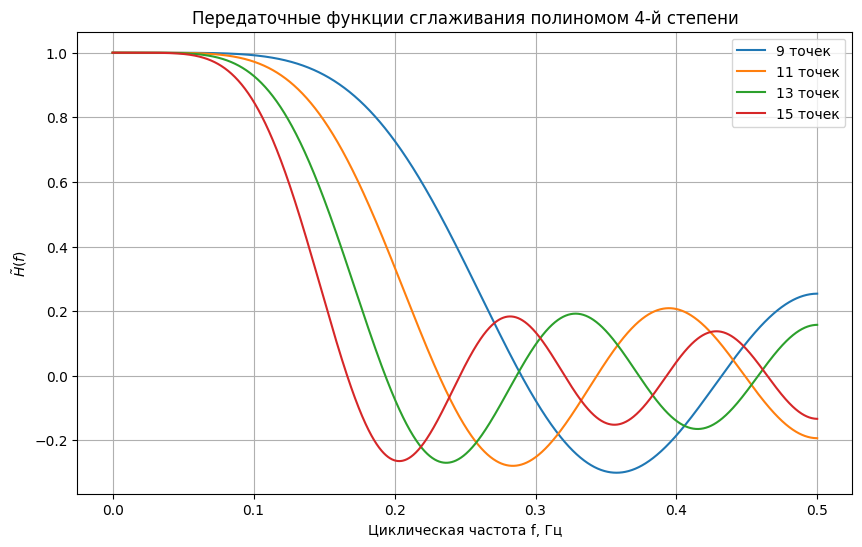

In [4]:
def transfer_function_poly4(N, w):
    """Передаточная функция для сглаживания полиномом 4-й степени по N точкам"""
    coefficients = {
        9: [179, 270, 60, -110, 30],
        11: [143, 240, 120, -20, -90, 36],
        13: [677, 1200, 780, 220, -270, -396, 220],
        15: [11063, 20250, 15000, 7510, -330, -5874, -5720, 4290]
    }

    denominator = {9: 429, 11: 429, 13: 2431, 15: 46189}[N]
    coeffs = coefficients[N]

    result = coeffs[0] * np.ones_like(w)
    for i in range(1, len(coeffs)):
        result += coeffs[i] * np.cos(i * w)

    return result / denominator

H9_poly4 = transfer_function_poly4(9, w_freq)
H11_poly4 = transfer_function_poly4(11, w_freq)
H13_poly4 = transfer_function_poly4(13, w_freq)
H15_poly4 = transfer_function_poly4(15, w_freq)

plt.figure(figsize=(10, 6))
plt.plot(f_freq, H9_poly4, label='9 точек')
plt.plot(f_freq, H11_poly4, label='11 точек')
plt.plot(f_freq, H13_poly4, label='13 точек')
plt.plot(f_freq, H15_poly4, label='15 точек')
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde H(f)$')
plt.title('Передаточные функции сглаживания полиномом 4-й степени')
plt.legend()
plt.grid(True)
plt.show()

* Характеристика ФНЧ: Все фильтры пропускают низкие частоты и подавляют высокие

* 9 точек: Наиболее широкая полоса пропускания, но умеренное подавление ВЧ
* 15 точек: Самая узкая полоса пропускания, но лучшее подавление высоких частот

* Сохраняет производные до 4-го порядка сигнала, меньше искажает форму пиков по сравнению с фильтрами низших порядков, имеет более плоскую АЧХ в полосе пропускания

* Увеличение N улучшает подавление шума, но может сглаживать быстрые изменения
* Полином высокой степени лучше сохраняет особенности сигнала при том же N

* Наличие отрицательных весов в импульсной характеристике обеспечивает лучшую форму АЧХ и уменьшает фазовые искажения

### 4. Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам.


Формулы Спенсера представляют собой специальные весовые функции для сглаживания временных рядов, разработанные для статистического анализа экономических данных. Эти фильтры обладают оптимизированными частотными характеристиками, обеспечивающими эффективное подавление высокочастотных флуктуаций при сохранении основных трендов.

Для сглаживания по формулам Спенсера используется нерекурсивный КИХ-фильтр с симметричной весовой функцией:

$$y_n = \sum_{k=-h}^{h} W_k \cdot s_{n+k}$$

где $W_k$ - весовые коэффициенты Спенсера, удовлетворяющие условию нормировки $\sum W_k = 1$.

#### Формулы для различных размеров окон

**Для 15 точек ($h=7$):**

$$y_n = \frac{1}{320}(-3s_{n-7}-6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}+67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}-6s_{n+6}-3s_{n+7})$$

Передаточная функция для гармонического сигнала $s_n = e^{j\omega n}$:
$$H_{15}(\omega) = \frac{1}{320}(74 + 134\cos\omega + 92\cos 2\omega + 42\cos 3\omega + 6\cos 4\omega - 10\cos 5\omega - 12\cos 6\omega - 6\cos 7\omega)$$

**Для 21 точки ($h=10$):**

$$y_n = \frac{1}{350}(-s_{n-10}-3s_{n-9}-5s_{n-8}-5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}-5s_{n+7}-5s_{n+8}-3s_{n+9}-s_{n+10})$$

Передаточная функция:
$$H_{21}(\omega) = \frac{1}{350}(60 + 114\cos\omega + 94\cos 2\omega + 66\cos 3\omega + 36\cos 4\omega + 12\cos 5\omega - 4\cos 6\omega - 10\cos 7\omega - 10\cos 8\omega - 6\cos 9\omega - 2\cos 10\omega)$$


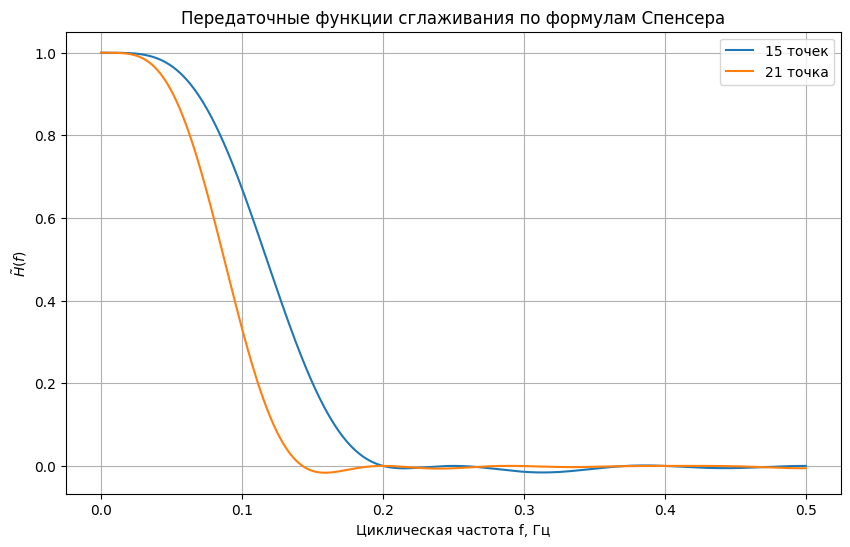

In [5]:
def transfer_function_spencer(N, w):
    """Передаточная функция для сглаживания по формулам Спенсера по N точкам"""
    coefficients = {
        15: [74, 134, 92, 42, 6, -10, -12, -6],
        21: [60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2]
    }

    denominator = {15: 320, 21: 350}[N]
    coeffs = coefficients[N]

    result = coeffs[0] * np.ones_like(w)
    for i in range(1, len(coeffs)):
        result += coeffs[i] * np.cos(i * w)

    return result / denominator

H15_Spencer = transfer_function_spencer(15, w_freq)
H21_Spencer = transfer_function_spencer(21, w_freq)

plt.figure(figsize=(10, 6))
plt.plot(f_freq, H15_Spencer, label='15 точек')
plt.plot(f_freq, H21_Spencer, label='21 точка')
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde H(f)$')
plt.title('Передаточные функции сглаживания по формулам Спенсера')
plt.legend()
plt.grid(True)
plt.show()

На графиках видно, что оба фильтра Спенсера эффективно подавляют высокие частоты. Полосы пропускания для N = 15 и N = 21 значительно уже по сравнению с полиномиальными фильтрами аналогичного размера.

* 15 точек: Обеспечивает умеренное подавление высоких частот при относительно широкой полосе пропускания

* 21 точка: Демонстрирует более узкую полосу пропускания и лучшее подавление высокочастотных компонентов


### 5. Графики в логарифмической шкале (Дб)


Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

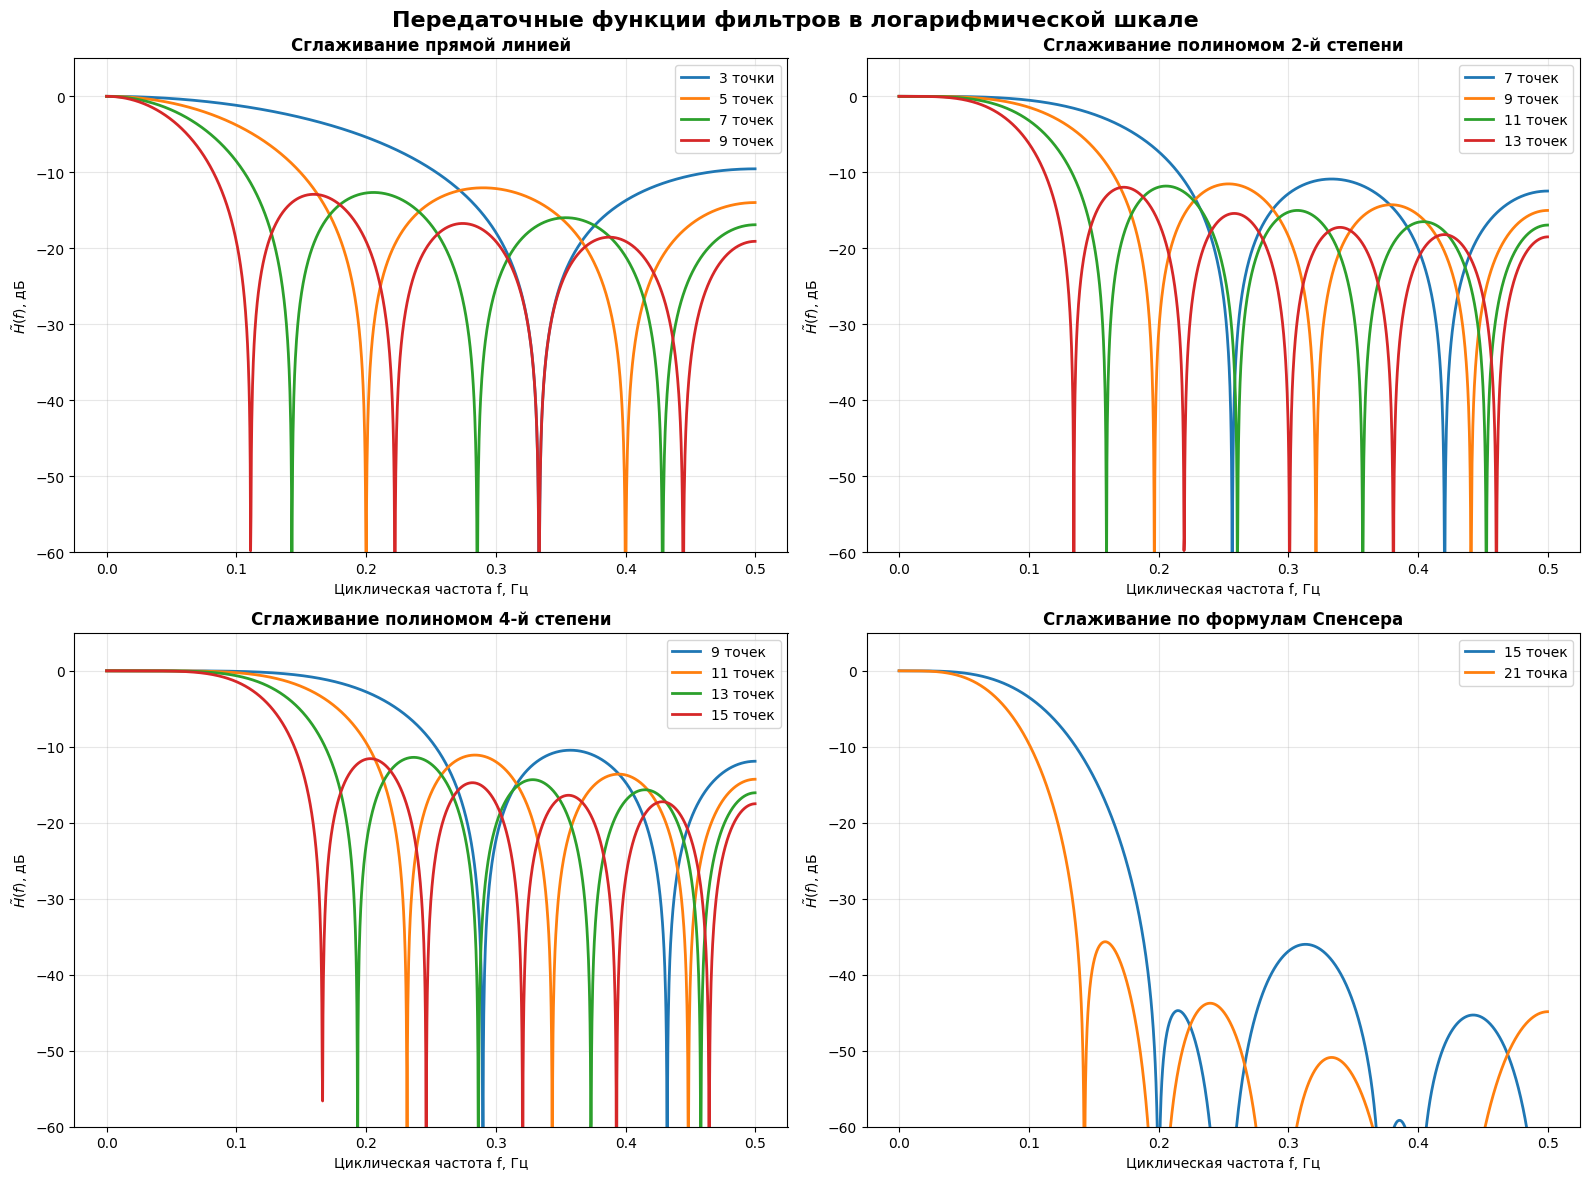

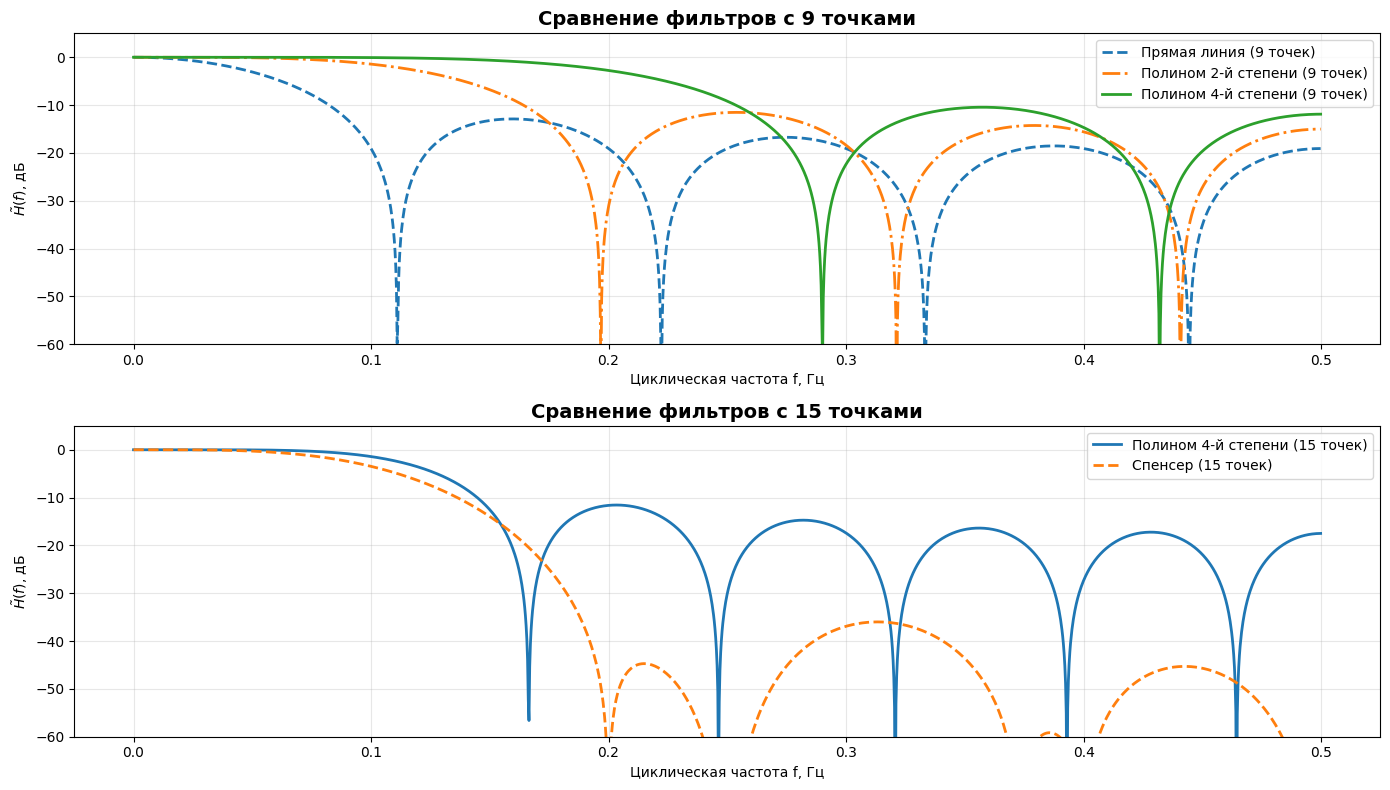

In [6]:
def to_db(H):
    """Преобразование амплитуды в децибелы"""
    return 20 * np.log10(np.abs(H))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0,0].plot(f_freq, to_db(H3_poly1), label='3 точки', linewidth=2)
axes[0,0].plot(f_freq, to_db(H5_poly1), label='5 точек', linewidth=2)
axes[0,0].plot(f_freq, to_db(H7_poly1), label='7 точек', linewidth=2)
axes[0,0].plot(f_freq, to_db(H9_poly1), label='9 точек', linewidth=2)
axes[0,0].set_xlabel('Циклическая частота f, Гц')
axes[0,0].set_ylabel('$\\tilde{H}(f)$, дБ')
axes[0,0].set_title('Сглаживание прямой линией', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(-60, 5)

axes[0,1].plot(f_freq, to_db(H7_poly2), label='7 точек', linewidth=2)
axes[0,1].plot(f_freq, to_db(H9_poly2), label='9 точек', linewidth=2)
axes[0,1].plot(f_freq, to_db(H11_poly2), label='11 точек', linewidth=2)
axes[0,1].plot(f_freq, to_db(H13_poly2), label='13 точек', linewidth=2)
axes[0,1].set_xlabel('Циклическая частота f, Гц')
axes[0,1].set_ylabel('$\\tilde{H}(f)$, дБ')
axes[0,1].set_title('Сглаживание полиномом 2-й степени', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_ylim(-60, 5)

axes[1,0].plot(f_freq, to_db(H9_poly4), label='9 точек', linewidth=2)
axes[1,0].plot(f_freq, to_db(H11_poly4), label='11 точек', linewidth=2)
axes[1,0].plot(f_freq, to_db(H13_poly4), label='13 точек', linewidth=2)
axes[1,0].plot(f_freq, to_db(H15_poly4), label='15 точек', linewidth=2)
axes[1,0].set_xlabel('Циклическая частота f, Гц')
axes[1,0].set_ylabel('$\\tilde{H}(f)$, дБ')
axes[1,0].set_title('Сглаживание полиномом 4-й степени', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_ylim(-60, 5)

axes[1,1].plot(f_freq, to_db(H15_Spencer), label='15 точек', linewidth=2)
axes[1,1].plot(f_freq, to_db(H21_Spencer), label='21 точка', linewidth=2)
axes[1,1].set_xlabel('Циклическая частота f, Гц')
axes[1,1].set_ylabel('$\\tilde{H}(f)$, дБ')
axes[1,1].set_title('Сглаживание по формулам Спенсера', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_ylim(-60, 5)

plt.suptitle('Передаточные функции фильтров в логарифмической шкале',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()




plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(f_freq, to_db(H9_poly1), label='Прямая линия (9 точек)', linewidth=2, linestyle='--')
plt.plot(f_freq, to_db(H9_poly2), label='Полином 2-й степени (9 точек)', linewidth=2, linestyle='-.')
plt.plot(f_freq, to_db(H9_poly4), label='Полином 4-й степени (9 точек)', linewidth=2)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde{H}(f)$, дБ')
plt.title('Сравнение фильтров с 9 точками', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-60, 5)

plt.subplot(2, 1, 2)
plt.plot(f_freq, to_db(H15_poly4), label='Полином 4-й степени (15 точек)', linewidth=2)
plt.plot(f_freq, to_db(H15_Spencer), label='Спенсер (15 точек)', linewidth=2, linestyle='--')
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('$\\tilde{H}(f)$, дБ')
plt.title('Сравнение фильтров с 15 точками', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-60, 5)

plt.tight_layout()
plt.show()

#### Отличия от линейных графиков

Линейный график хорошо показывает:
- Полосу пропускания — её ширину и плавность
- Как фильтр сохраняет полезный сигнал (низкие частоты)

Но у него есть недостаток: участки с малой амплитудой (близкой к нулю) почти не видны.

Логарифмическая шкала исправляет этот недостаток:
- Хорошо видно полосу подавления высоких частот
- Можно сравнить, насколько сильно разные фильтры подавляют помехи
- Видны даже очень маленькие значения коэффициента передачи

#### Практический смысл

На графиках в дБ сразу видно:
- Какие фильтры лучше подавляют высокие частоты
- Насколько эффективно каждый фильтр убирает шум
- Как количество точек влияет на качество фильтрации


## Выводы

В ходе выполнения лабораторной работы были получены аналитические выражения для передаточных функций фильтров, реализующих сглаживание полиномами 1-й, 2-й и 4-й степеней, а также по формулам Спенсера. На основе выведенных формул построены и проанализированы амплитудно-частотные характеристики для различного количества точек N.

Построение графиков в логарифмической шкале (дБ) позволило детально исследовать характеристики фильтров в области подавления высоких частот и оценить глубину подавления помех, что невозможно было сделать на линейных графиках.

Проведенный сравнительный анализ выявил ключевые различия в эффективности подавления шума и сохранении полезного сигнала для каждого типа фильтра, а также показал влияние количества точек сглаживания на частотные характеристики фильтров.